### AI Research Assistant - LangChain + LangGraph + Groq Integration

This project builds a powerful **AI Research Assistant** using:

- **LangChain**
- **LangGraph**
- **Groq LLMs**
- **Arxiv**, **Wikipedia**, and **Tavily** search tools

The agent is capable of:

- Intelligently selecting the right tool  
- Querying research papers from Arxiv  
- Searching the web via Tavily  
- Fetching knowledge from Wikipedia  
- Generating answers using a Groq-powered LLM  

This forms a complete, modular, and scalable research automation pipeline.


### 1. Install Required Libraries

In [1]:
!pip install -U langchain langchain-core langchain-community langchain-text-splitters langgraph python-dotenv pydantic wikipedia arxiv pymupdf
!pip install -U langchain-groq

### 2. Configure Tools (Arxiv, Wikipedia, Tavily)

In [2]:
#Tools 
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [3]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query Arxiv Papers")
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("Attention is all you need")

'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifi'

In [5]:
arxiv.invoke("What is the latest research on Quantum Computing?")

"Published: 2008-03-21\nTitle: Developments in Black Hole Research: Classical, Semi-classical, and Quantum\nAuthors: A. DeBenedictis\nSummary: The possible existence of black holes has fascinated scientists at least since Michell and Laplace's proposal that a gravitating object could exist from which light could not escape. In the 20th century, in light of the general theory of relativity, it became apparent that, were such objects to exist, their structure would be far richer than originally imagin"

In [6]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


### 3. Initialize Groq LLM

In [ ]:
import os
os.environ["GROQ_API_KEY"] = ""
os.environ["TAVILY_API_KEY"] = ""



In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()


/tmp/ipython-input-988821005.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [9]:
tavily.invoke("Provide me the recent AI news")

[{'title': "Three Biggest AI Stories in Nov. 2025: 'AI is no longer siloed'",
  'url': 'https://etcjournal.com/2025/11/13/three-biggest-ai-stories-in-nov-2025-ai-is-no-longer-siloed/',
  'content': 'The Keyword’s official recap, “The latest AI news we announced in October,” published on November 4, 2025, offers one of the clearest snapshots of a platform-scale shift: Google aligning workplace AI under Gemini Enterprise, unveiling research tools like Cell2Sentence-Scale for oncology, and highlighting a quantum algorithm that outpaces supercomputers for specific tasks. This article, authored by the Keyword Team, is compelling not just for the breadth of updates but for how they converge: [...] Among October’s most consequential developments was the reported “gigawatt era” hardware surge—epitomized by the OpenAI & NVIDIA 10 GW partnership referenced in Netanel Siboni’s “What’s New in AI? The Latest AI News October 2025,” last edited November 1, 2025, on Voxfor. While the piece surveys mul

#### Combine all these tools

In [10]:
#Combine all these tools into list

tools = [arxiv, wiki, tavily]


In [11]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="openai/gpt-oss-120b",
    temperature=0
)

In [12]:
llm.invoke("Hello, what model are you?")

AIMessage(content='Hello! I’m ChatGPT, built on OpenAI’s GPT‑4 architecture. How can I help you today?', additional_kwargs={'reasoning_content': 'The user asks: "Hello, what model are you?" We should respond with a brief answer. According to policy, we can disclose we are GPT-4. The user is just asking. So answer: I\'m ChatGPT, based on GPT-4 architecture.'}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 78, 'total_tokens': 165, 'completion_time': 0.181127584, 'completion_tokens_details': {'reasoning_tokens': 54}, 'prompt_time': 0.002886463, 'prompt_tokens_details': None, 'queue_time': 0.070715986, 'total_time': 0.184014047}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_db2a4a56cd', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--ef8bcc3b-0147-495d-93d9-a895be3f4fa7-0', usage_metadata={'input_tokens': 78, 'output_tokens': 87, 'total_tokens': 165, 'output_token_details': {'rea

#### Bind Tools to LLM

In [13]:
llm_with_tools = llm.bind_tools(tools=tools)

### 4. Test the Tools with the LLM

In [14]:
#Execute this code (tavily)
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks: "What is the recent news on AI?" Need to provide recent news. Should browse recent news. Use tavily_search_results_json with query "recent AI news November 2025".', 'tool_calls': [{'id': 'fc_fddc0074-e9fa-4cc7-b1ea-259ca0c676f1', 'function': {'arguments': '{"query":"AI news November 2025"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 246, 'total_tokens': 324, 'completion_time': 0.176427726, 'completion_tokens_details': {'reasoning_tokens': 42}, 'prompt_time': 0.010237176, 'prompt_tokens_details': None, 'queue_time': 0.034388983, 'total_time': 0.186664902}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_62894050be', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--9ef7e152-2ac3-464e-aa76-ba0a41db2b31-0', tool_calls=[{'name': 'tavily_

In [15]:
#Execute this code-2 (arxiv)
llm_with_tools.invoke("Please give me the latest research papers on Quantum Computing ")

AIMessage(content='', additional_kwargs={'reasoning_content': 'The user wants latest research papers on Quantum Computing. Need to provide recent papers. Use arxiv search. Let\'s query arxiv for "quantum computing" sorted by recent.', 'tool_calls': [{'id': 'fc_83a7b78f-e503-4354-9ee5-befca90315fd', 'function': {'arguments': '{"query":"quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 249, 'total_tokens': 314, 'completion_time': 0.135496783, 'completion_tokens_details': {'reasoning_tokens': 36}, 'prompt_time': 0.009359904, 'prompt_tokens_details': None, 'queue_time': 0.072828693, 'total_time': 0.144856687}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_eec389997b', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--53b888cb-65de-424a-aa26-81adfe85330d-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum compu

In [16]:
#Execute this code-3 (Wikipedia)
llm_with_tools.invoke("What is machine learning")

AIMessage(content='**Machine learning (ML)** is a sub‑field of artificial intelligence (AI) that focuses on building systems that can **learn from data** and improve their performance on a task without being explicitly programmed for every possible scenario. In other words, instead of writing hard‑coded rules, we give a computer algorithm a large set of examples (the *training data*) and let it infer patterns, relationships, or decision boundaries that it can then apply to new, unseen data.\n\n---\n\n## Core Concepts\n\n| Concept | What It Means |\n|---------|---------------|\n| **Data** | The raw material for learning—examples, measurements, images, text, etc. Usually split into **training**, **validation**, and **test** sets. |\n| **Model** | A mathematical representation (e.g., a set of parameters) that maps inputs to outputs. Examples: linear regression, decision trees, neural networks. |\n| **Training** | The process of adjusting the model’s parameters to minimize a loss (error) o

In [17]:
#Execute this code-4  (Model itself)
llm_with_tools.invoke("Tell me about yourself")

AIMessage(content='I’m ChatGPT, a large‑language‑model AI created by OpenAI. I’ve been trained on a diverse mix of text—from books and articles to code and conversation—so I can understand and generate natural‑language responses across a wide range of topics.\n\n**What I can do**\n\n- **Answer questions** – factual, conceptual, or “how‑to” queries.\n- **Explain concepts** – break down complex ideas into simpler terms.\n- **Assist with writing** – drafts, edits, brainstorming, tone adjustments, etc.\n- **Help with programming** – code snippets, debugging tips, algorithm explanations.\n- **Generate creative content** – stories, poems, jokes, role‑play scenarios.\n- **Provide tutoring** – step‑by‑step solutions in math, science, language learning, and more.\n- **Summarize information** – condense articles, reports, or long texts.\n- **Offer guidance** – productivity tips, decision‑making frameworks, mental‑wellness resources (though I’m not a substitute for professional advice).\n\n**How 

### Workflow Using LangGraph

### 5. Create the LangGraph State Schema

In [18]:
#State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage # hUMAN MESSAGE OR AI message
from typing import Annotated # Labelling
from langgraph.graph.message import add_messages ## Reducers in LangGraph

In [19]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [20]:
from IPython.display import display,Image
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition # For tools flow

### 6. Define the LLM Node for Tool Calling

In [30]:
def tool_calling_llm(state: State):
    result = llm_with_tools.invoke(state["messages"])
    return {"messages": state["messages"] + [result]}

#Build Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

### 7. Build the LangGraph Workflow

In [31]:
#Edges
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)
builder.add_edge("tools",END)

In [32]:
graph = builder.compile()

### 8. Visualize the Graph

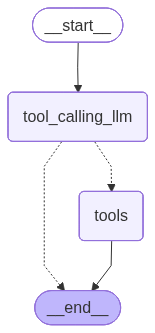

In [33]:
display(Image(graph.get_graph().draw_mermaid_png()))

### 9. Execute the Graph

In [35]:
messages = graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (fc_d47cc5f1-520f-40c6-92c6-8f1fab24e05f)
 Call ID: fc_d47cc5f1-520f-40c6-92c6-8f1fab24e05f
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, base


### IF the Query is about multiple tools

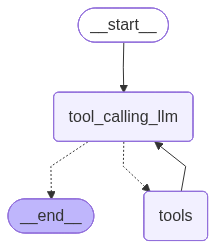

In [36]:
def tool_calling_llm(state: State):
    result = llm_with_tools.invoke(state["messages"])
    return {"messages": state["messages"] + [result]}

#Build Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

#Edges
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)
builder.add_edge("tools","tool_calling_llm")
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [39]:
messages = graph.invoke({"messages":"Gicve me the recent AI news and also give me the latest research papers on Quantum Computing"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Gicve me the recent AI news and also give me the latest research papers on Quantum Computing
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_b070f455-5544-4b6b-8cb0-4e0077945784)
 Call ID: fc_b070f455-5544-4b6b-8cb0-4e0077945784
  Args:
    query: latest AI news November 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Three Biggest AI Stories in Nov. 2025: 'AI is no longer siloed'", "url": "https://etcjournal.com/2025/11/13/three-biggest-ai-stories-in-nov-2025-ai-is-no-longer-siloed/", "content": "The Keyword’s official recap, “The latest AI news we announced in October,” published on November 4, 2025, offers one of the clearest snapshots of a platform-scale shift: Google aligning workplace AI under Gemini Enterprise, unveiling research tools lik